## Step to follow when creating a model

Step 1
- Import model library

Step 2
- instantiate the model
- model = model(parameters)

Step 3
- fit the model
- model.fit(X,y)

Step 4
- make predictions
- model.predict(X_test)

Step 5
- Check model performance
- model.score(X_test, y_test)

In [1]:
# import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [2]:
# import data
df = pd.read_csv('telecom_churn_clean.csv')
df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

<AxesSubplot:xlabel='churn', ylabel='count'>

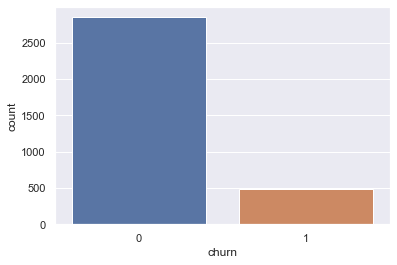

In [4]:
# see the data labels
sns.countplot(data=df, x='churn')

In [9]:
# convert values in array( .values converts the selected column items into an array)
df["churn"].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
df[["account_length", "customer_service_calls"]].values

array([[128,   1],
       [107,   1],
       [137,   0],
       ...,
       [ 28,   2],
       [184,   2],
       [ 74,   0]], dtype=int64)

In [22]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the target variable
y = df["churn"].values #target(right Labels)
X = df[["account_length", "customer_service_calls"]].values #features

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6) # instantiate the model

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [30]:
X_t = df.sample(5)
l = list(X_t['churn'])
test = X_t[["account_length", "customer_service_calls"]].values

In [31]:
l

[0, 0, 0, 1, 0]

In [32]:
test

array([[115,   1],
       [ 86,   0],
       [127,   2],
       [121,   3],
       [163,   1]], dtype=int64)

In [33]:
# Predict the labels for the X_new
y_pred = knn.predict(test)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 0 0 0 0]


In [34]:
# check model accuracy
knn.score(X,y)

0.8682868286828683

## Check the model Accuracy

In [40]:
# Import the module
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    stratify=y)
knn = KNeighborsClassifier(n_neighbors=11)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8605697151424287


# Overfitting and underfitting

In [23]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train,y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.8627156789197299, 2: 0.8754688672168042, 3: 0.8735933983495874, 4: 0.8709677419354839, 5: 0.8717179294823706, 6: 0.8675918979744937, 7: 0.8687171792948237, 8: 0.86384096024006, 9: 0.8653413353338335, 10: 0.8634658664666166, 11: 0.86384096024006, 12: 0.8615903975993998} 
 {1: 0.7916041979010495, 2: 0.8575712143928036, 3: 0.8500749625187406, 4: 0.8590704647676162, 5: 0.8515742128935532, 6: 0.856071964017991, 7: 0.8500749625187406, 8: 0.8530734632683659, 9: 0.8590704647676162, 10: 0.8590704647676162, 11: 0.8605697151424287, 12: 0.856071964017991}


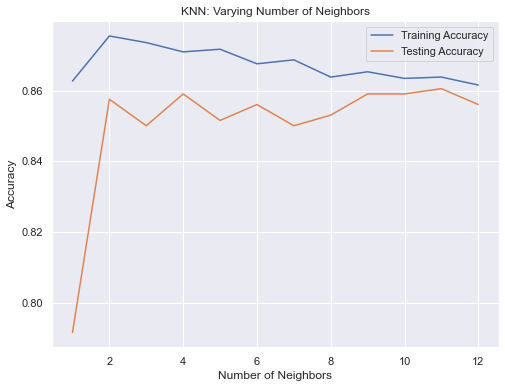

In [25]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [26]:
from sklearn.preprocessing import PowerTransformer


In [ ]:
log = PowerTransformer()